# *1.  Import libraries and read dataset*

In [1]:
import os
print(os.getcwd())


d:\1.Study\AIO\4.Code\AIO2024_Exercise\Module_3\M3_Week1_170824


In [2]:
import pandas as pd
dataset_path = 'opsd_germany_daily.csv'

In [3]:
 # Read data from .csv file
opsd_daily = pd.read_csv(dataset_path)

print(opsd_daily.shape)
print(opsd_daily.dtypes)
opsd_daily.head(3)

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [4]:
opsd_daily.values

array([['2006-01-01', 1069.1840000000002, nan, nan, nan],
       ['2006-01-02', 1380.5210000000002, nan, nan, nan],
       ['2006-01-03', 1442.533, nan, nan, nan],
       ...,
       ['2017-12-29', 1295.08753, 584.277, 29.854000000000003,
        614.1309999999999],
       ['2017-12-30', 1215.44897, 721.2470000000001, 7.467, 728.714],
       ['2017-12-31', 1107.11488, 721.1760000000002, 19.98, 741.156]],
      dtype=object)

In [11]:
opsd_daily.index


RangeIndex(start=0, stop=4383, step=1)

In [12]:
opsd_daily.shape

(4383, 5)

In [13]:
opsd_daily.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [5]:
print(opsd_daily["Date"].dtypes)


object


In [6]:
print(opsd_daily['Date'].dtype)
# dạng object là string nên phải đổi về timestamp
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
# ko đổi thì bị gì?

object


In [7]:
# Lấy dữ liệu từ cột 'Consumption'
consumption_data = opsd_daily['Consumption']

# Lấy dữ liệu từ cột 'Consumption'
consumption_data = opsd_daily.loc[:, 'Consumption']


In [8]:
# Lấy dữ liệu của ngày 2006-01-01
row_data = opsd_daily.loc['2006-01-01']
# Lấy dữ liệu của hàng đầu tiên (index 0)
row_data = opsd_daily.iloc[0]


KeyError: '2006-01-01'

In [ ]:
value = opsd_daily.loc['2017-01-02', 'Consumption']
print(value)


1441.052


In [ ]:
#  Time Series, ta có thể chọn cột Date làm index 
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)



,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [ ]:
# Khi mới đọc file thì vẫn là object (str) nên phải đổi Date thành datetime
a = pd.read_csv('opsd_germany_daily.csv')
a.loc['2014-01-20':'2014-01-22']

,Date,Consumption,Wind,Solar,Wind+Solar


In [ ]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
# index_col = 0 set cột đầu tiên là index
#parse_dates=True để chuyển Date thành datetime thay vì object
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [ ]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


# *2. Time-based indexing*


2.1. Time-based indexing


In [ ]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


2.2. Partial-string indexing

In [ ]:
#Partial-string indexing
# Slicing theo mô tả thời gian một cách chung chung
opsd_daily.loc['2012-02'].head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


# *3. Visualizing time series data*

In [ ]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook

In [ ]:
print(opsd_daily.columns)
opsd_daily.shape


Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'Weekday Name'],
      dtype='object')


(4383, 7)

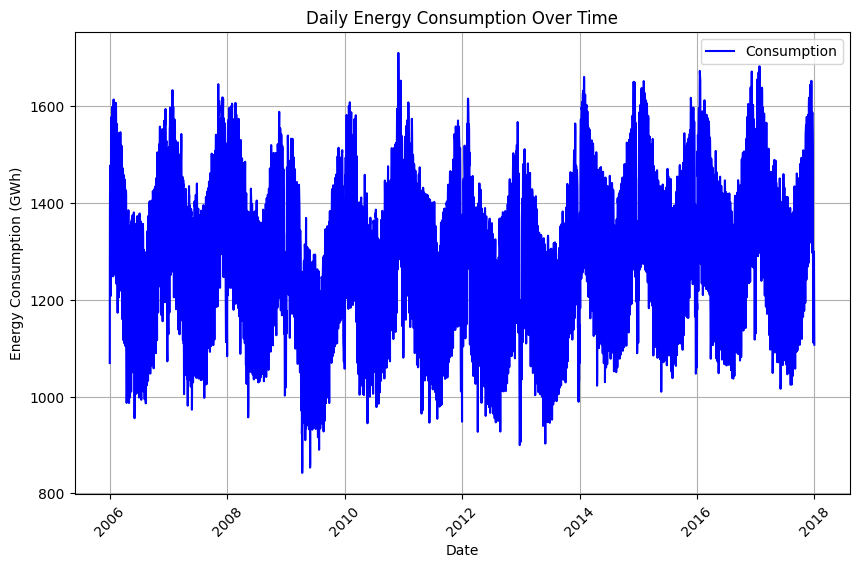

In [ ]:
import matplotlib.pyplot as plt

# Giả sử cột Date là index trong DataFrame của bạn (nếu chưa có, bạn cần gán trước)
# opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
# opsd_daily.set_index('Date', inplace=True)

# Vẽ biểu đồ Consumption theo thời gian với matplotlib
plt.figure(figsize=(10, 6))
plt.plot(opsd_daily.index, opsd_daily['Consumption'], label='Consumption', color='blue')

# Thêm thông tin cho biểu đồ
plt.xlabel('Date')
plt.ylabel('Energy Consumption (GWh)')
plt.title('Daily Energy Consumption Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


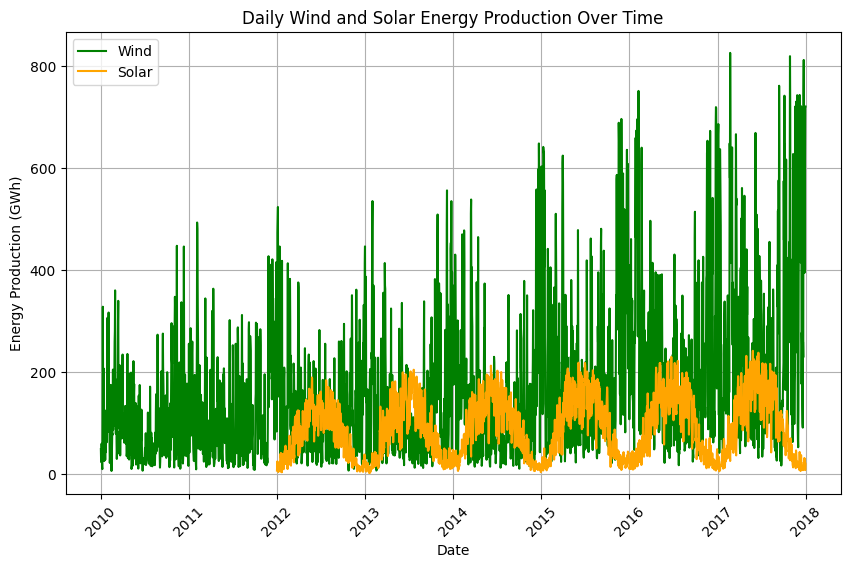

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ Timeline của Wind và Solar sử dụng seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=opsd_daily.index, y=opsd_daily['Wind'], label='Wind', color='green')
sns.lineplot(x=opsd_daily.index, y=opsd_daily['Solar'], label='Solar', color='orange')

# Thêm thông tin cho biểu đồ
plt.xlabel('Date')
plt.ylabel('Energy Production (GWh)')
plt.title('Daily Wind and Solar Energy Production Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Axes: xlabel='Date'>

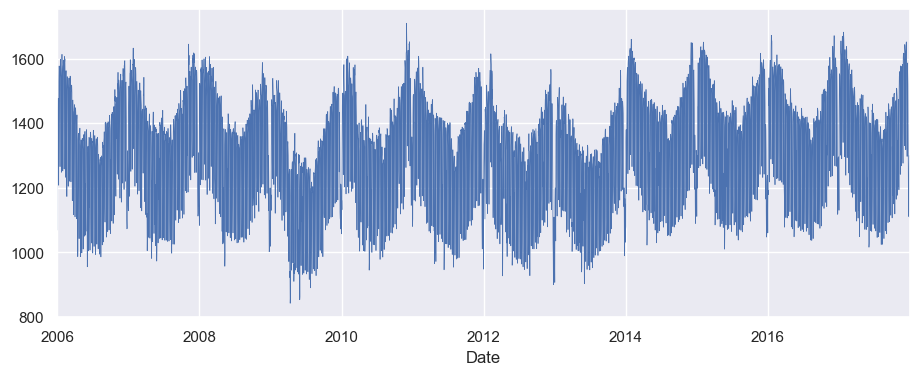

In [ ]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
opsd_daily['Consumption'].plot(linewidth=0.5)

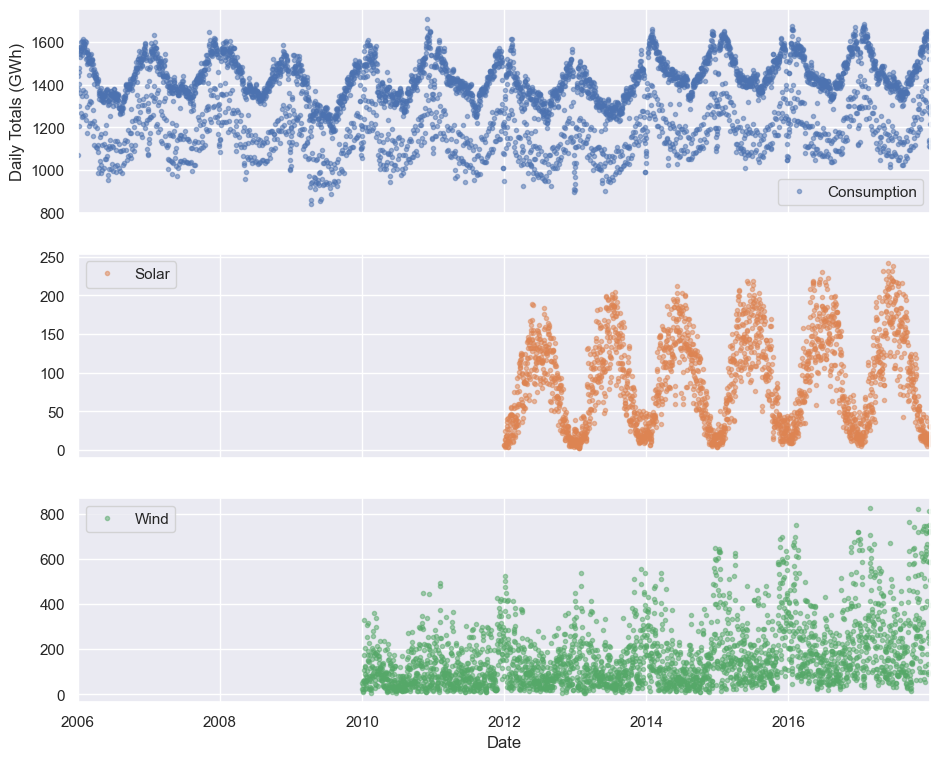

In [ ]:
# từng đồ thị riêng lẻ
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',
figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
    plt.show()

# *4. Seasonality*

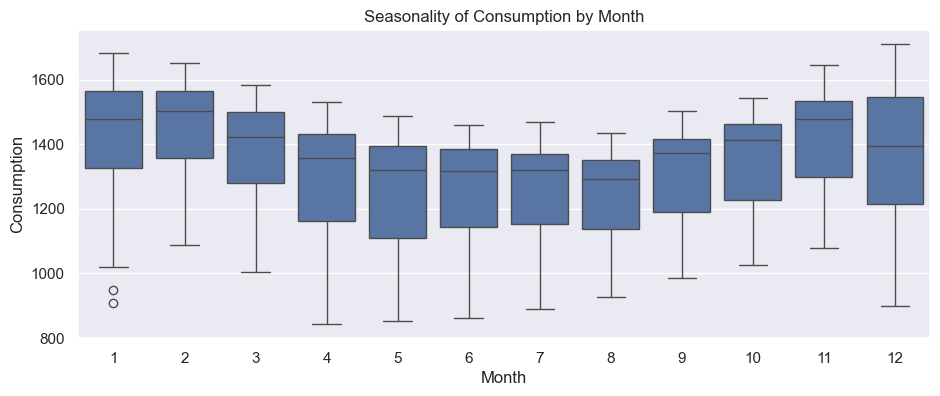

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thêm cột 'Month' để nhóm dữ liệu theo tháng
opsd_daily['Month'] = opsd_daily.index.month

# Vẽ boxplot theo tháng để xem xét seasonality
sns.boxplot(x='Month', y='Consumption', data=opsd_daily)
plt.title('Seasonality of Consumption by Month')
plt.show()


In [ ]:
a = zip(['Consumption', 'Solar', 'Wind'], axes)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    print(name, ax)

Consumption Axes(0.125,0.653529;0.775x0.226471)
Solar Axes(0.125,0.381765;0.775x0.226471)
Wind Axes(0.125,0.11;0.775x0.226471)


In [ ]:
print(axes)

[<Axes: xlabel='Date', ylabel='Daily Totals (GWh)'>
 <Axes: xlabel='Date', ylabel='Daily Totals (GWh)'>
 <Axes: xlabel='Date', ylabel='Daily Totals (GWh)'>]


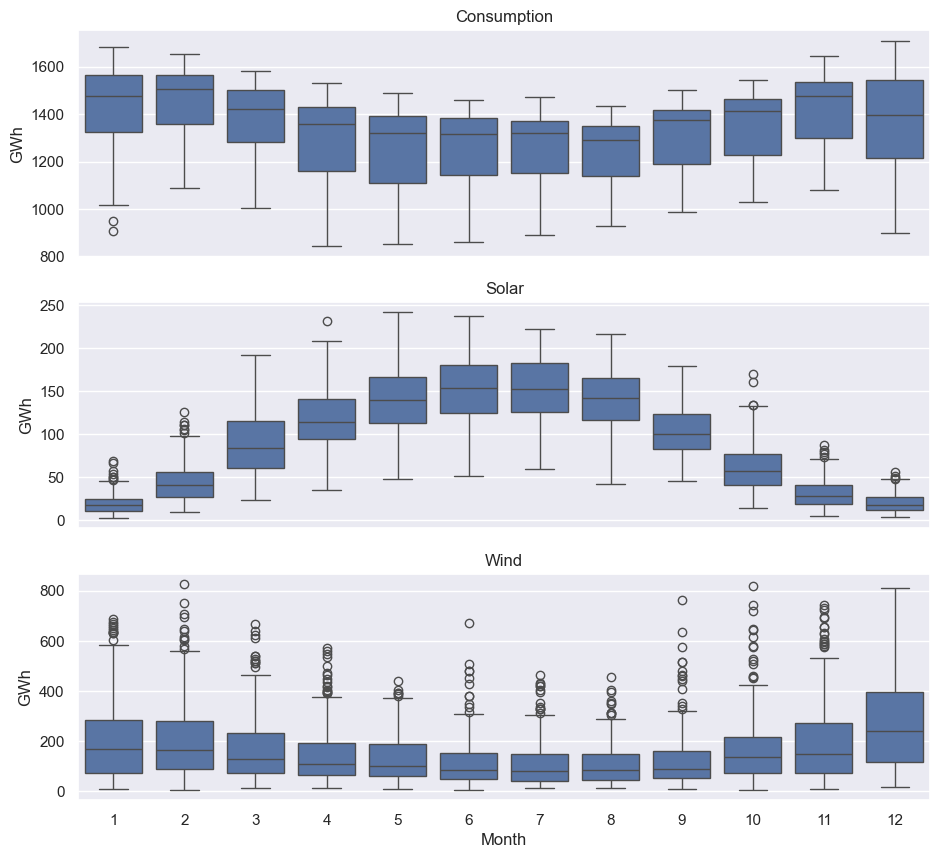

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)  # 
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):   # khi print axes ra là tọa đọ subplot
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)     # ax là subplot
    ax.set_ylabel('GWh')                                       # 
    ax.set_title(name)                                         #
    if ax != axes[-1]:                                         #
        ax.set_xlabel('')                                      # 


# *5. Frequencies*

In [ ]:
print(opsd_daily.dtypes)


Consumption     float64
Wind            float64
Solar           float64
Wind+Solar      float64
Year              int32
Month             int32
Weekday Name     object
dtype: object


In [ ]:
pd.date_range('1998-03-10', '1998-03-15', freq='D') # D là Day
# generates a sequence of dates or times. 

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Chọn chỉ các cột số
numeric_columns = opsd_daily.select_dtypes(include='number').columns
# chú ý là khi áp dụng cắc hàm như mean phải để ở dạng số int32 thay vì Object string
# Resample và tính trung bình chỉ trên các cột số
daily_data = opsd_daily[numeric_columns].resample('D').mean()
print(daily_data)




            Consumption     Wind   Solar  Wind+Solar    Year  Month
Date                                                               
2006-01-01   1069.18400      NaN     NaN         NaN  2006.0    1.0
2006-01-02   1380.52100      NaN     NaN         NaN  2006.0    1.0
2006-01-03   1442.53300      NaN     NaN         NaN  2006.0    1.0
2006-01-04   1457.21700      NaN     NaN         NaN  2006.0    1.0
2006-01-05   1477.13100      NaN     NaN         NaN  2006.0    1.0
...                 ...      ...     ...         ...     ...    ...
2017-12-27   1263.94091  394.507  16.530     411.037  2017.0   12.0
2017-12-28   1299.86398  506.424  14.162     520.586  2017.0   12.0
2017-12-29   1295.08753  584.277  29.854     614.131  2017.0   12.0
2017-12-30   1215.44897  721.247   7.467     728.714  2017.0   12.0
2017-12-31   1107.11488  721.176  19.980     741.156  2017.0   12.0

[4383 rows x 6 columns]


In [ ]:
quarterly_data = opsd_daily.resample('QE').sum()
quarterly_data.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-03-31,130361.821,0.0,0.0,0.0,180540,180,SundayMondayTuesdayWednesdayThursdayFridaySatu...
2006-06-30,114363.360,0.0,0.0,0.0,182546,455,SaturdaySundayMondayTuesdayWednesdayThursdayFr...
2006-09-30,116664.135,0.0,0.0,0.0,184552,735,SaturdaySundayMondayTuesdayWednesdayThursdayFr...
2006-12-31,127679.220,0.0,0.0,0.0,184552,1012,SundayMondayTuesdayWednesdayThursdayFridaySatu...
2007-03-31,129072.567,0.0,0.0,0.0,180630,180,MondayTuesdayWednesdayThursdayFridaySaturdaySu...


In [ ]:
# To select an arbitrary sequence of date/time values from a pandas time series,
 # we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
print(times_sample)
# Select the specified dates and just the Consumption column

DatetimeIndex(['2013-02-03', '2013-02-06', '2013-02-08'], dtype='datetime64[ns]', freq=None)


In [ ]:
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [ ]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
print(consum_freq)
# Create a column with missings forward filled
consum_freq['Consumption- Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

            Consumption
2013-02-03     1109.639
2013-02-04          NaN
2013-02-05          NaN
2013-02-06     1451.449
2013-02-07          NaN
2013-02-08     1433.098


,Consumption,Consumption- Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


# *6. Resampling*

In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, WeekdayName)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [ ]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


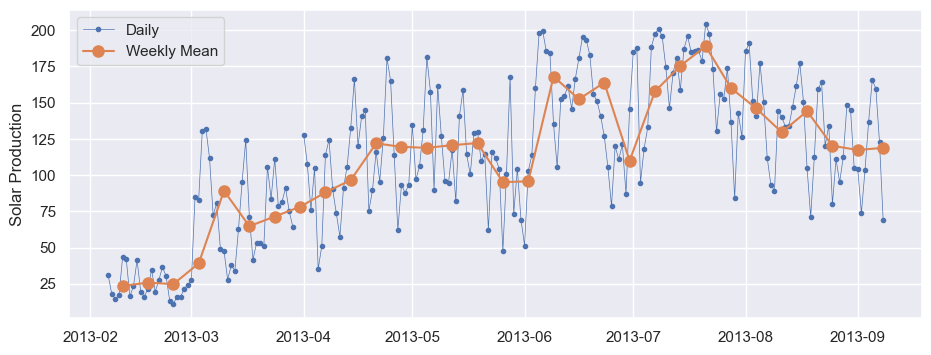

In [ ]:
# Chọn khoảng thời gian để hiển thị
start, end = '2013-02-06', '2013-09-08'

# Vẽ dữ liệu hàng ngày và hàng tuần
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean')
ax.set_ylabel('Solar Production')
ax.legend()
plt.show()

In [ ]:
opsd_daily.loc['2011-01-20':'2011-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2011-01-20,1559.147,35.057,NaN,NaN,2011,1,Thursday
2011-01-21,1544.487,25.984,NaN,NaN,2011,1,Friday
2011-01-22,1338.866,25.296,NaN,NaN,2011,1,Saturday


In [ ]:
# Specify the data columns we want to include (i.e., exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# Compute the annual sums, setting the value to NaN for any year which has fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('Y').sum(min_count=360)

opsd_annual


C:\Users\COHOTECH\AppData\Local\Temp\ipykernel_5348\2671235858.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  opsd_annual = opsd_daily[data_columns].resample('Y').sum(min_count=360)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.53600,NaN,NaN,NaN
2007-12-31,496631.84700,NaN,NaN,NaN
2008-12-31,495570.87600,NaN,NaN,NaN
2009-12-31,459737.42800,NaN,NaN,NaN
2010-12-31,488588.70000,35911.777,NaN,NaN
2011-12-31,484814.08600,44032.951,NaN,NaN
2012-12-31,469574.75400,45862.667,27887.332,73749.999
2013-12-31,463336.85300,47197.832,29559.780,76697.443
2014-12-31,504164.82100,51107.672,32498.307,83370.502


In [ ]:
# The default index of the resampled DataFrame is the last day of each year ('2006-12-31', '2007-12-31', etc.)
# To make life easier, set the index to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']

# Display the last few rows
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


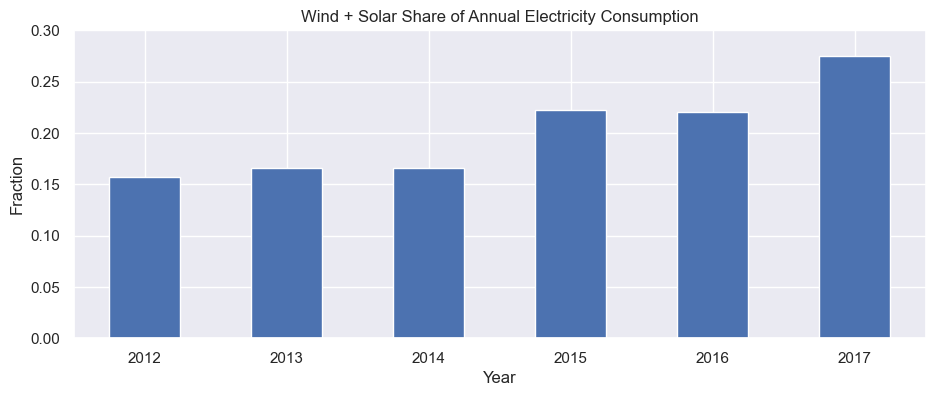

In [ ]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)
plt.show()


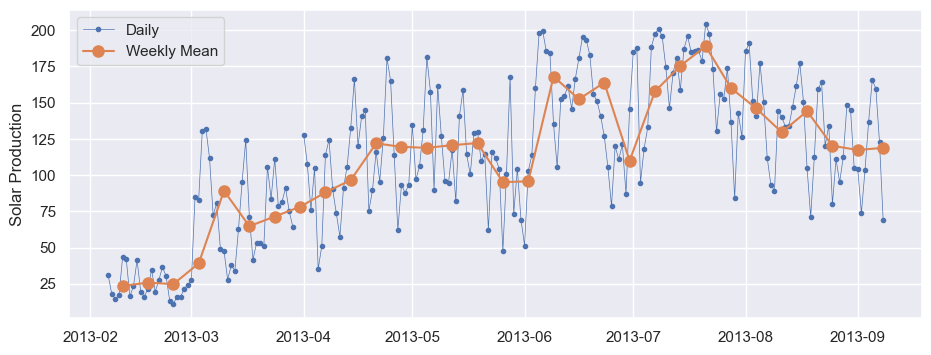

In [ ]:
# Select the time range to display
start, end = '2013-02-06', '2013-09-08'

# Plot daily and weekly data
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean')
ax.set_ylabel('Solar Production')
ax.legend()
plt.show()


# *7. Rolling Windows*

In [ ]:
# Calculate the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(window=7, center=True).mean()
opsd_7d


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


In [ ]:
# Display the first 10 rows of the rolling mean
print(opsd_7d.head(10))


            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01          NaN   NaN    NaN         NaN
2006-01-02          NaN   NaN    NaN         NaN
2006-01-03          NaN   NaN    NaN         NaN
2006-01-04  1361.471429   NaN    NaN         NaN
2006-01-05  1381.300143   NaN    NaN         NaN
2006-01-06  1402.557571   NaN    NaN         NaN
2006-01-07  1421.754429   NaN    NaN         NaN
2006-01-08  1438.891429   NaN    NaN         NaN
2006-01-09  1449.769857   NaN    NaN         NaN
2006-01-10  1469.994857   NaN    NaN         NaN


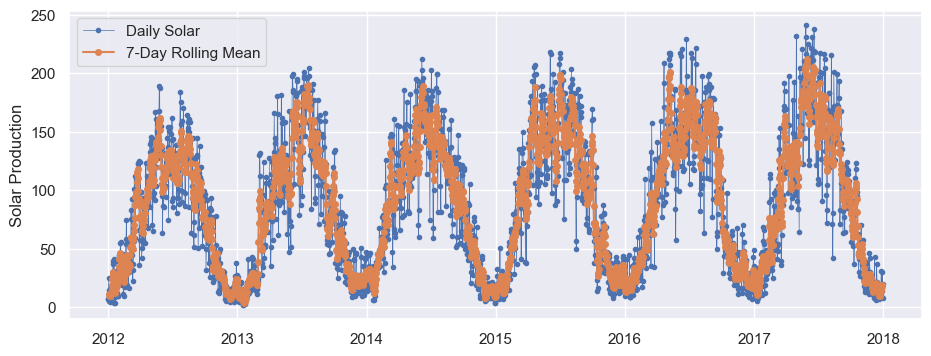

In [ ]:
# Plot the original daily data and the 7-day rolling mean
fig, ax = plt.subplots()
ax.plot(opsd_daily['Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily Solar')
ax.plot(opsd_7d['Solar'], marker='o', markersize=4, linestyle='-', label='7-Day Rolling Mean')
ax.set_ylabel('Solar Production')
ax.legend()
plt.show()


# *8.Trend*

C:\Users\COHOTECH\AppData\Local\Temp\ipykernel_5348\1383479515.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


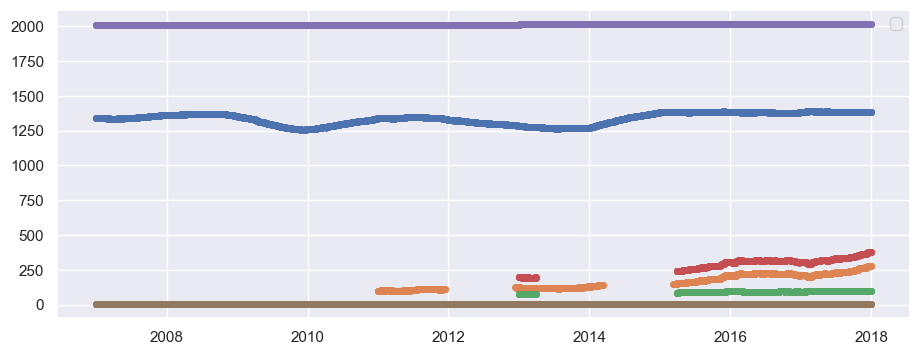

In [ ]:
# Tính trung bình cho cửa sổ 3 ngày, trượt theo từng ngày
fig, ax = plt.subplots()

rolling_mean = daily_data.rolling(window=365).mean()
ax.plot(rolling_mean,  marker='o', markersize=4, linestyle='-')
ax.legend()
plt.show()


* 1. Xác Định Xu Hướng Bằng Mắt Thường:

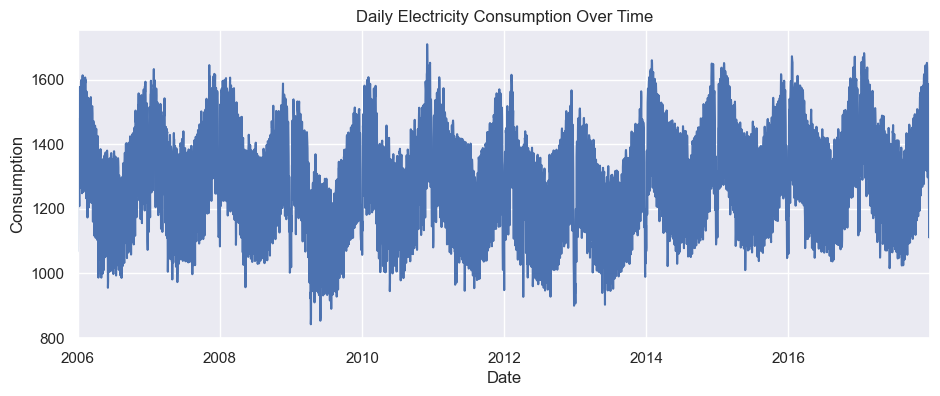

In [ ]:
#Xác Định Xu Hướng Bằng Mắt Thường:
import matplotlib.pyplot as plt

# Vẽ đồ thị lượng tiêu thụ điện theo thời gian
opsd_daily['Consumption'].plot(title='Daily Electricity Consumption Over Time')
plt.ylabel('Consumption')
plt.show()


* Sử Dụng Các Phương Pháp Lọc Xu Hướng:



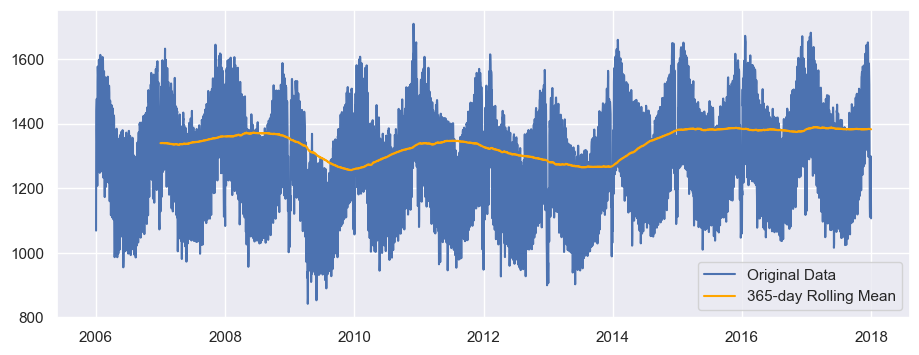

In [ ]:
# Sử dụng Rolling Mean để làm mịn dữ liệu
opsd_daily['Rolling_Mean'] = opsd_daily['Consumption'].rolling(window=365).mean()

# Vẽ dữ liệu gốc và trung bình động
plt.plot(opsd_daily['Consumption'], label='Original Data')
plt.plot(opsd_daily['Rolling_Mean'], label='365-day Rolling Mean', color='orange')
plt.legend()
plt.show()


In [ ]:
# Tính trung bình di động với cửa sổ 365 ngày
opsd_365d = daily_data.rolling(window=365, center=True, min_periods=360).mean()


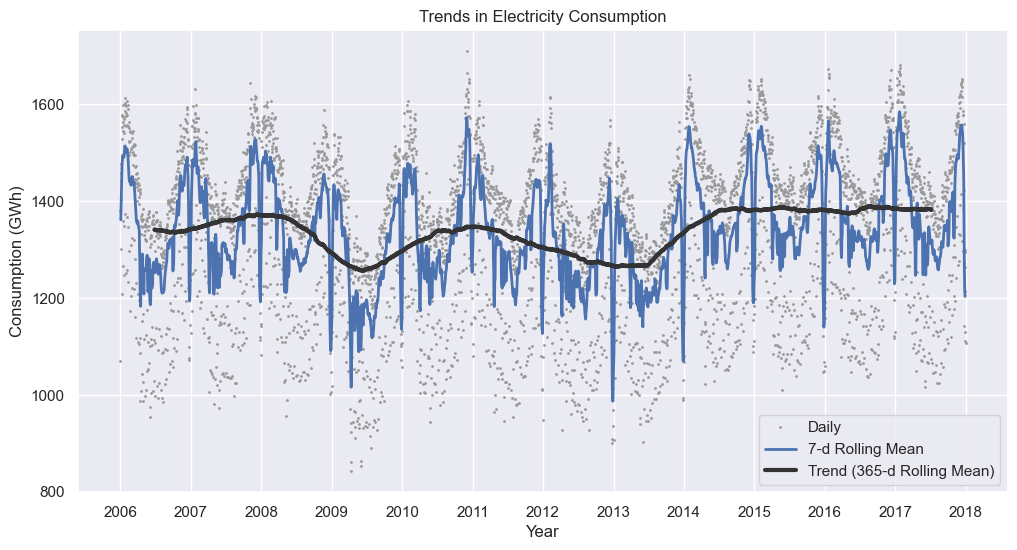

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))

# Dữ liệu hàng ngày
ax.plot(daily_data.index, daily_data['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')

# Trung bình di động 7 ngày
ax.plot(opsd_7d.index, opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')

# Trung bình di động 365 ngày
ax.plot(opsd_365d.index, opsd_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

# Cài đặt trục x, tiêu đề và nhãn
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

plt.show()


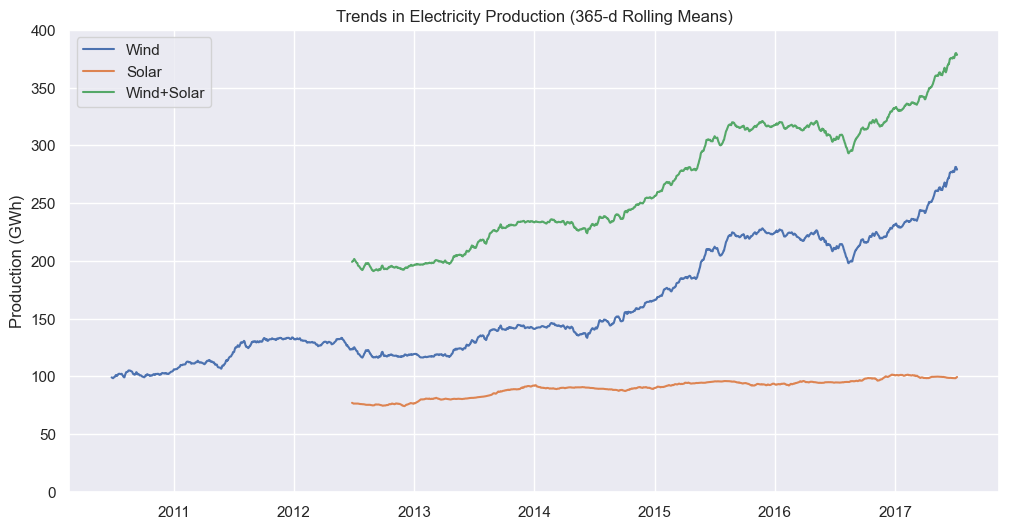

In [ ]:
# Vẽ biểu đồ trung bình di động 365 ngày cho sản xuất năng lượng
fig, ax = plt.subplots(figsize=(12, 6))

for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d.index, opsd_365d[nm], label=nm)

# Cài đặt trục x, giới hạn trục y, thêm legend và nhãn
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')

plt.show()


In [ ]:
print(opsd_365d['Solar'].loc['2015-01-01':])


Date
2015-01-01    89.984882
2015-01-02    89.948964
2015-01-03    89.979323
2015-01-04    90.124334
2015-01-05    90.152474
                ...    
2017-12-27          NaN
2017-12-28          NaN
2017-12-29          NaN
2017-12-30          NaN
2017-12-31          NaN
Freq: D, Name: Solar, Length: 1096, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Tạo dữ liệu mẫu cho ví dụ
dates = pd.date_range(start='2006-01-01', end='2017-12-31', freq='D')
print(dates)


DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=4383, freq='D')


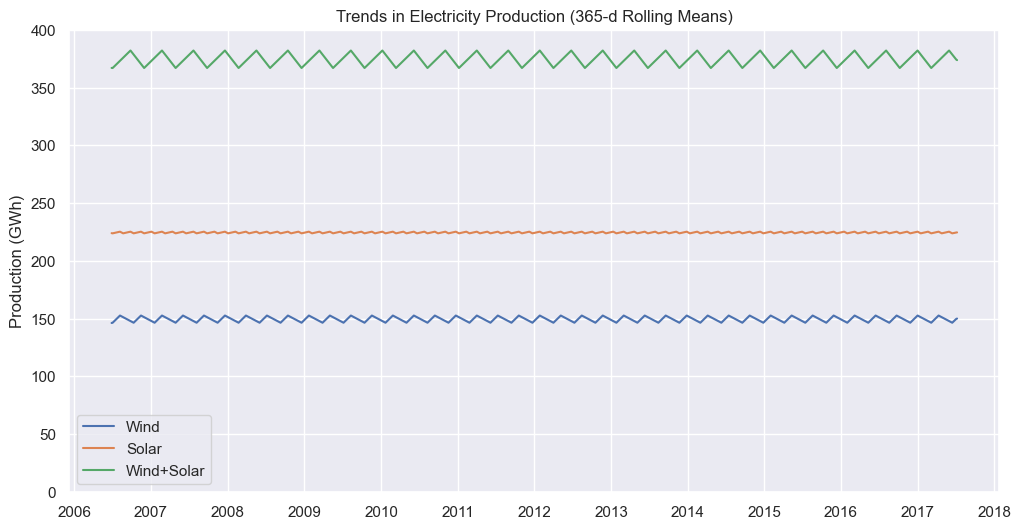

2015-01-01    223.986301
2015-01-02    224.027397
2015-01-03    224.068493
2015-01-04    224.109589
2015-01-05    224.150685
                 ...    
2017-12-27           NaN
2017-12-28           NaN
2017-12-29           NaN
2017-12-30           NaN
2017-12-31           NaN
Freq: D, Name: Solar, Length: 1096, dtype: float64


In [ ]:
data = {
    'Wind': [100 + i % 100 for i in range(len(dates))],
    'Solar': [200 + i % 50 for i in range(len(dates))],
    'Wind+Solar': [300 + i % 150 for i in range(len(dates))]
}
opsd_365d = pd.DataFrame(data, index=dates)

# Tính toán trung bình di động 365 ngày
opsd_365d = opsd_365d.rolling(window=365, center=True, min_periods=360).mean()

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))

for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d.index, opsd_365d[nm], label=nm)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)')

plt.show()

# Truy cập dữ liệu từ ngày 1 tháng 1 năm 2015
print(opsd_365d['Solar'].loc['2015-01-01':])

In [ ]:
print()

SyntaxError: invalid syntax (1764027069.py, line 1)